In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_p_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        27.8102 (20.4425, 38.0097) (19.6477, 36.7304) 17.0828 (Jnode 202)\n',
 't_n104        26.8974 (19.9185, 36.6914) (19.2229, 35.5244) 16.3014 (Jnode 201)\n',
 't_n105        25.9414 (19.3183, 35.3984) (18.6084, 34.2103) 15.6019 (Jnode 200)\n',
 't_n106        22.9292 (17.2671, 31.4804) (16.7364, 30.4065) 13.6701 (Jnode 199)\n',
 't_n107        21.0810 (16.0229, 29.0513) (15.4951, 28.0118) 12.5167 (Jnode 198)\n',
 't_n108        20.7129 (15.7606, 28.5408) (15.2068, 27.4867) 12.2799 (Jnode 197)\n',
 't_n109        20.2678 (15.4097, 27.9157) (14.8881, 26.9115) 12.0234 (Jnode 196)\n',
 't_n110        19.9027 (15.1089, 27.4019) (14.5686, 26.3959) 11.8274 (Jnode 195)\n',
 't_n111        19.7784 (15.0047, 27.2374) (14.5019, 26.2706) 11.7687 (Jnode 194)\n',
 't_n112        12.5444 ( 8.1390, 18.4194) ( 7.7781, 17.8756) 10.0976 (Jnode 193)\n',
 't_n113        10.3721 ( 6.4713, 15.6163) ( 6.1304, 15.1023)  8.9719 (Jnode 192)\n',
 't_n114         9.1854 ( 5.5774, 14.1198) ( 5.2378, 1

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[27.8102,
 26.8974,
 25.9414,
 22.9292,
 21.081,
 20.7129,
 20.2678,
 19.9027,
 19.7784,
 12.5444,
 10.3721,
 9.1854,
 6.5591,
 5.5265,
 5.6062,
 7.6013,
 4.3569,
 15.4437,
 8.2723,
 11.2323,
 10.3745,
 4.3821,
 6.1064,
 15.1538,
 12.5404,
 7.6229,
 14.8817,
 9.4613,
 8.1807,
 6.3187,
 6.0038,
 2.8599,
 2.5145,
 13.2503,
 17.6387,
 8.7934,
 16.9889,
 13.9911,
 12.0144,
 9.6182,
 7.4332,
 7.1722,
 6.763,
 4.8135,
 2.0475,
 12.099,
 6.9198,
 3.5829,
 1.9259,
 14.9402,
 7.1142,
 3.6252,
 5.643,
 12.3436,
 8.6379,
 8.9827,
 3.1975,
 17.5999,
 16.0831,
 13.954,
 8.6932,
 4.5341,
 3.9786,
 0.6515,
 12.398,
 9.325,
 8.1074,
 26.8957,
 23.9559,
 21.3291,
 19.5197,
 17.3783,
 13.7203,
 12.0914,
 11.2189,
 6.8578,
 4.6521,
 3.5093,
 10.0866,
 6.6217,
 2.3548,
 5.2667,
 11.4597,
 7.6835,
 5.6242,
 3.1924,
 2.0064,
 7.2067,
 4.396,
 3.5153,
 13.6023,
 7.7541,
 7.1109,
 3.7653,
 0.9392,
 7.0054,
 14.4084,
 8.7888,
 3.7845,
 20.1867,
 9.2272]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[29.8042,
 25.0623,
 24.037,
 21.6059,
 20.69,
 18.5833,
 11.3036,
 11.1613,
 10.601,
 10.0146,
 9.4043,
 6.9143,
 2.9948,
 1.7355,
 3.609,
 6.9728,
 5.4468,
 9.919,
 9.2717,
 5.984,
 4.6631,
 1.7629,
 3.8255,
 9.0772,
 8.2531,
 2.8756,
 10.4484,
 9.2455,
 5.9791,
 4.9244,
 5.8316,
 3.0242,
 2.2104,
 4.933,
 17.0416,
 12.279,
 18.9874,
 15.8868,
 12.0048,
 9.6343,
 7.3084,
 6.7816,
 4.1262,
 1.8736,
 1.3411,
 14.2787,
 12.1406,
 4.4084,
 1.6476,
 22.1001,
 18.4576,
 12.9481,
 6.4999,
 14.7705,
 3.7322,
 9.8967,
 4.4901,
 24.4158,
 21.8106,
 15.6556,
 8.3425,
 7.0506,
 5.5187,
 3.4894,
 17.7961,
 8.9658,
 13.8908,
 19.5801,
 18.3205,
 17.32,
 16.2771,
 14.6629,
 13.9876,
 13.2139,
 12.3315,
 10.897,
 9.0464,
 5.4627,
 7.3775,
 4.0927,
 3.3948,
 3.4296,
 12.1793,
 10.7033,
 9.9363,
 8.0454,
 4.1308,
 9.8791,
 7.8444,
 3.8566,
 13.7812,
 12.2423,
 7.7249,
 6.8041,
 1.7257,
 6.0808,
 7.7773,
 5.9134,
 2.3217,
 18.6193,
 9.159]

In [12]:
posterior_mean_iqtree

[27.8102,
 26.8974,
 25.9414,
 22.9292,
 21.081,
 20.7129,
 20.2678,
 19.9027,
 19.7784,
 12.5444,
 10.3721,
 9.1854,
 6.5591,
 5.5265,
 5.6062,
 7.6013,
 4.3569,
 15.4437,
 8.2723,
 11.2323,
 10.3745,
 4.3821,
 6.1064,
 15.1538,
 12.5404,
 7.6229,
 14.8817,
 9.4613,
 8.1807,
 6.3187,
 6.0038,
 2.8599,
 2.5145,
 13.2503,
 17.6387,
 8.7934,
 16.9889,
 13.9911,
 12.0144,
 9.6182,
 7.4332,
 7.1722,
 6.763,
 4.8135,
 2.0475,
 12.099,
 6.9198,
 3.5829,
 1.9259,
 14.9402,
 7.1142,
 3.6252,
 5.643,
 12.3436,
 8.6379,
 8.9827,
 3.1975,
 17.5999,
 16.0831,
 13.954,
 8.6932,
 4.5341,
 3.9786,
 0.6515,
 12.398,
 9.325,
 8.1074,
 26.8957,
 23.9559,
 21.3291,
 19.5197,
 17.3783,
 13.7203,
 12.0914,
 11.2189,
 6.8578,
 4.6521,
 3.5093,
 10.0866,
 6.6217,
 2.3548,
 5.2667,
 11.4597,
 7.6835,
 5.6242,
 3.1924,
 2.0064,
 7.2067,
 4.396,
 3.5153,
 13.6023,
 7.7541,
 7.1109,
 3.7653,
 0.9392,
 7.0054,
 14.4084,
 8.7888,
 3.7845,
 20.1867,
 9.2272]

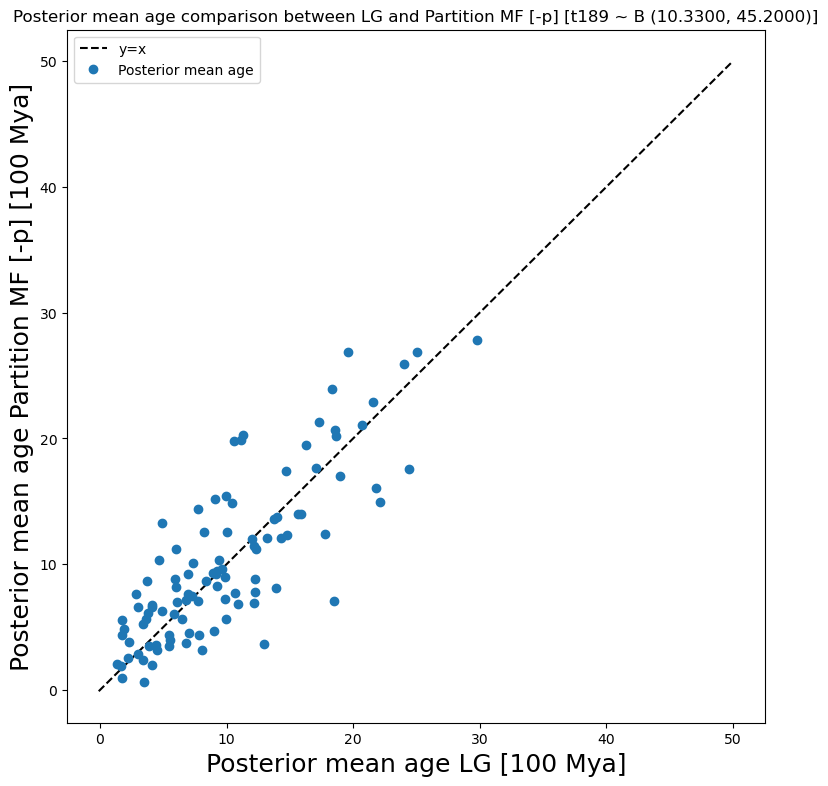

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age Partition MF [-p] [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and Partition MF [-p] [t189 ~ B (10.3300, 45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_p_middle_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')